# Import Basic packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# inbuilt dataset
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# drop - alive, pclass, who, fare, embarked, adult_male, alone
df = df.drop(['alive','pclass','who','fare','embarked','adult_male','alone'], axis=1)

In [5]:
df.head()

,survived,sex,age,sibsp,parch,class,deck,embark_town
0,0,male,22.0,1,0,Third,NaN,Southampton
1,1,female,38.0,1,0,First,C,Cherbourg
2,1,female,26.0,0,0,Third,NaN,Southampton
3,1,female,35.0,1,0,First,C,Southampton
4,0,male,35.0,0,0,Third,NaN,Southampton


In [6]:
df.isnull().sum()

survived         0
sex              0
age            177
sibsp            0
parch            0
class            0
deck           688
embark_town      2
dtype: int64

In [7]:
# missing data found
# age - 177
print((177/891)*100)
# deck - 688
print((688/891)*100)
# embark_town - 2
print((2/891)*100)

19.865319865319865
77.21661054994388
0.22446689113355783


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   class        891 non-null    category
 6   deck         203 non-null    category
 7   embark_town  889 non-null    object  
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 44.1+ KB


In [9]:
# here the deck crosses the 25% threshold value of missing data therefore deck column should be droped
df = df.drop('deck', axis=1)

In [10]:
df.head()

,survived,sex,age,sibsp,parch,class,embark_town
0,0,male,22.0,1,0,Third,Southampton
1,1,female,38.0,1,0,First,Cherbourg
2,1,female,26.0,0,0,Third,Southampton
3,1,female,35.0,1,0,First,Southampton
4,0,male,35.0,0,0,Third,Southampton


<AxesSubplot:ylabel='age'>

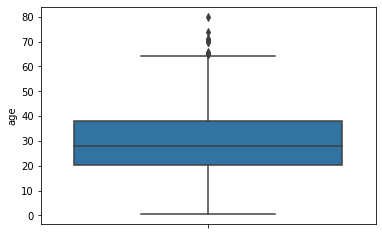

In [11]:
# age - number (mean / median)
sns.boxplot(y='age', data=df)

In [12]:
#there is a presence of outliers so age column should be filled with median
df['age'] = df['age'].fillna(df['age'].median())

In [13]:
# embark_town : object - mode / most frequent occurance
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [14]:
df['embark_town'] = df['embark_town'].fillna('Southampton')

In [15]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
class          0
embark_town    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [17]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df = pd.get_dummies(df, columns=['sex'])

In [18]:
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df = pd.get_dummies(df, columns=['class'])

In [19]:
df['embark_town'] = df['embark_town'].astype('category')
df['embark_town'] = df['embark_town'].cat.codes
df = pd.get_dummies(df, columns=['embark_town'])

In [20]:
df.head()

,survived,age,sibsp,parch,sex_0,sex_1,class_0,class_1,class_2,embark_town_0,embark_town_1,embark_town_2
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [21]:
df = df.drop(['sex_0','class_0','embark_town_0'], axis=1)
df.head()

,survived,age,sibsp,parch,sex_1,class_1,class_2,embark_town_1,embark_town_2
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,1,0,1,0,1


In [22]:
#spliting the varibles into x and y
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
x.head()

,age,sibsp,parch,sex_1,class_1,class_2,embark_town_1,embark_town_2
0,22.0,1,0,1,0,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,0,1,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,1,0,1,0,1


In [24]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [25]:
#importing train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

C:\Users\yasho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [28]:
logit.coef_

array([[-0.03831378, -0.28227513, -0.02291607, -2.59528625, -0.72583091,
        -2.05391012, -0.05313438, -0.49840949]])

In [29]:
logit.intercept_

array([3.87682452])

In [30]:
#checking the accuracy score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
print(confusion_matrix(y_train, y_pred_train))

print("\n")

print(confusion_matrix(y_test, y_pred_test))

[[370  52]
 [ 72 174]]


[[113  14]
 [ 35  61]]


In [32]:
print(classification_report(y_train, y_pred_train))

print("\n")

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       422
           1       0.77      0.71      0.74       246

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668



              precision    recall  f1-score   support

           0       0.76      0.89      0.82       127
           1       0.81      0.64      0.71        96

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [33]:
print(accuracy_score(y_train, y_pred_train))

print("\n")

print(accuracy_score(y_test, y_pred_test))

0.8143712574850299


0.7802690582959642


# MLE / ROC

In [34]:
from sklearn.metrics import roc_auc_score
logit_roc_auc = roc_auc_score(y_test, y_pred_test)
logit_roc_auc

0.7625902230971128

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

In [37]:
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.11023622, 1.        ])

array([0.        , 0.63541667, 1.        ])

array([2, 1, 0], dtype=int64)

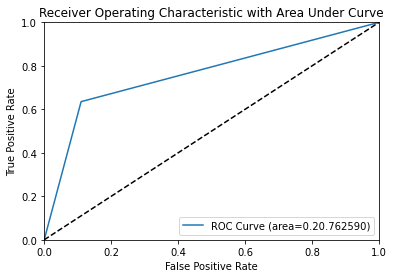

In [38]:
# plot of a ROC Curve and AUC

plt.figure()
plt.plot(fpr,tpr, label="ROC Curve (area=0.2%f)"% logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# cross validation score - K-Fold : improving your accuracy

from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(logit, X=x_train, y=y_train, cv = 15)
accuracy_test = cross_val_score(logit, X=x_test, y=y_test, cv = 15)
print(accuracy_train)
print('\n')
print(accuracy_test)

C:\Users\yasho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yasho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.82222222 0.86666667 0.75555556 0.82222222 0.77777778 0.71111111
 0.93333333 0.75555556 0.70454545 0.84090909 0.86363636 0.79545455
 0.79545455 0.72727273 0.90909091]


[0.86666667 0.86666667 0.86666667 0.93333333 0.6        0.73333333
 0.8        0.8        0.86666667 0.73333333 0.8        0.86666667
 0.73333333 0.64285714 0.57142857]


In [40]:
print("Train Accuracy :", accuracy_train[6])
print('\n')
print("Test Accuracy :" , accuracy_test[3])

Train Accuracy : 0.9333333333333333


Test Accuracy : 0.9333333333333333


In [41]:
#we can also go with mean but for better accuracy we take index....
print("Train Accuracy :", accuracy_train.mean())
print('\n')
print("Test Accuracy :" , accuracy_test.mean())

Train Accuracy : 0.8053872053872053


Test Accuracy : 0.7787301587301587


In [42]:
from sklearn.tree import DecisionTreeClassifier
DT_model_1 = DecisionTreeClassifier(criterion='gini')
DT_model_2 = DecisionTreeClassifier(criterion='entropy')
DT_model_1.fit(x_train, y_train)
DT_model_2.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [43]:
# Gini
y_pred_g_train = DT_model_1.predict(x_train)
y_pred_g_test = DT_model_1.predict(x_test)

# entropy
y_pred_e_train = DT_model_2.predict(x_train)
y_pred_e_test = DT_model_2.predict(x_test)

In [44]:
# Gini
print(accuracy_score(y_train, y_pred_g_train))

print("\n")

print(accuracy_score(y_test, y_pred_g_test))

print("\n")
# Entropy
print(accuracy_score(y_train, y_pred_e_train))

print("\n")

print(accuracy_score(y_test, y_pred_e_test))

0.9461077844311377


0.757847533632287


0.9461077844311377


0.7533632286995515


In [45]:
from sklearn.model_selection import cross_val_score
accuracy_train = cross_val_score(DT_model_1, X=x_train, y=y_train, cv = 15)
accuracy_test = cross_val_score(DT_model_1, X=x_test, y=y_test, cv = 15)
print(accuracy_train)
print('\n')
print(accuracy_test)

[0.86666667 0.86666667 0.66666667 0.88888889 0.77777778 0.73333333
 0.82222222 0.77777778 0.75       0.79545455 0.77272727 0.77272727
 0.68181818 0.77272727 0.90909091]


[0.86666667 0.8        0.8        0.66666667 0.66666667 0.66666667
 0.73333333 0.73333333 0.8        0.73333333 0.93333333 0.73333333
 0.8        0.78571429 0.42857143]


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=600,criterion='gini')
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=600)

In [48]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [49]:
print(accuracy_score(y_train, y_pred_rf_train))

print("\n")

print(accuracy_score(y_test, y_pred_rf_test))

0.9461077844311377


0.7802690582959642


In [50]:
from sklearn.model_selection import cross_val_score
#accuracy_train = cross_val_score(rf_model, X=x_train, y=y_train, cv = 20)
accuracy_test = cross_val_score(rf_model, X=x_test, y=y_test, cv = 20)
#print(accuracy_train)
#print('\n')
print(accuracy_test)

[0.66666667 0.75       0.91666667 0.63636364 0.63636364 0.54545455
 0.81818182 0.54545455 0.72727273 0.81818182 0.81818182 0.63636364
 0.63636364 0.90909091 0.72727273 0.81818182 0.81818182 0.72727273
 0.63636364 0.45454545]


In [51]:
print(accuracy_test[2])

0.9166666666666666
